In [1]:
import pandas as pd
import seaborn as sns
data = pd.read_fwf('Nov 2020.txt', error_bad_lines=False)
data = data["County\tElection Date\tPrecinct\tContest Group ID\tContest Type\tContest Name\tChoice\tChoice Party\tVote For\tElection Day\tOne Stop\tAbsentee"]
data = data.str.split(pat="\t")
concatlength = pd.concat([data, data.str.len()], axis=1)
concatlength = concatlength[concatlength.iloc[:, 1] == 15]
data = concatlength.iloc[:, 0]

In [2]:
Nov2020 = pd.DataFrame(data.tolist())
Nov2020.columns = ["County", "Election Date", "Precinct", "Contest Group ID", "Contest Type", "Contest Name", "Choice", "Choice Party", "Vote For", "Election Day", "One Stop", "Absentee by Mail", "Provisional", "Total Votes", "Real Precinct"]
Nov2020.head()

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct
0,TYRRELL,11/03/2020,3,1359,S,NC TREASURER,Ronnie Chatterji,DEM,1,16,0,0,0,16,Y
1,WAYNE,11/03/2020,06,1011,S,NC COURT OF APPEALS JUDGE SEAT 05,Fred Gore,REP,1,95,0,0,0,95,Y
2,FORSYTH,11/03/2020,081,1342,S,NC SUPERINTENDENT OF PUBLIC INSTRUCTION,Jen Mangrum,DEM,1,204,1076,367,7,1654,Y
3,NEW HANOVER,11/03/2020,W03,1373,S,US PRESIDENT,Donald J. Trump,REP,1,71,0,31,1,103,Y
4,MECKLENBURG,11/03/2020,241,1008,S,NC COMMISSIONER OF INSURANCE,Mike Causey,REP,1,348,2257,0,0,2605,Y


In [41]:
governor = Nov2020[Nov2020["Contest Name"] == "NC GOVERNOR"]
president = Nov2020[Nov2020["Contest Name"] == "US PRESIDENT"]
ussenate = Nov2020[Nov2020["Contest Name"] == "US SENATE"]

# Filter to remove write-ins

governor = governor[governor["Choice Party"] != ""]
president = president[president["Choice Party"] != ""]
ussenate = ussenate[ussenate["Choice Party"] != ""]

governor['Total Votes'] = governor['Total Votes'].astype(int)
president['Total Votes'] = president['Total Votes'].astype(int)
ussenate['Total Votes'] = ussenate['Total Votes'].astype(int)

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct
3,NEW HANOVER,11/03/2020,W03,1373,S,US PRESIDENT,Donald J. Trump,REP,1,71,0,31,1,103,Y
15,UNION,11/03/2020,008,1373,S,US PRESIDENT,Donald J. Trump,REP,1,89,548,25,1,663,Y
27,AVERY,11/03/2020,05,1373,S,US PRESIDENT,Donald J. Trump,REP,1,91,0,0,0,91,Y
28,PITT,11/03/2020,OS STUDENT CENTER,1373,S,US PRESIDENT,Jo Jorgensen,LIB,1,0,122,0,0,122,N
48,BUNCOMBE,11/03/2020,35.1,1373,S,US PRESIDENT,Howie Hawkins,GRE,1,1,0,0,0,1,Y
50,JOHNSTON,11/03/2020,TRANSFER,1373,S,US PRESIDENT,Don Blankenship,CST,1,0,0,0,0,0,N
56,MARTIN,11/03/2020,ONE STOP EES,1373,S,US PRESIDENT,Howie Hawkins,GRE,1,0,5,0,0,5,N
59,GUILFORD,11/03/2020,G56,1373,S,US PRESIDENT,Jo Jorgensen,LIB,1,1,0,0,0,1,Y
104,GUILFORD,11/03/2020,G16,1373,S,US PRESIDENT,Howie Hawkins,GRE,1,1,0,0,0,1,Y
124,FORSYTH,11/03/2020,101,1373,S,US PRESIDENT,Donald J. Trump,REP,1,201,449,85,4,739,Y


In [57]:
prespiv = president.pivot_table("Total Votes", index = "County", columns = "Choice Party", aggfunc = sum)
govpiv = governor.pivot_table("Total Votes", index = "County", columns = "Choice Party", aggfunc = sum)

prespiv.columns = ["CST", "DEM", "GRE", "LIB", "REP"]
prespiv['County'] = prespiv.index

govpiv.columns = ["CST", "DEM", "LIB", "REP"]
govpiv['County'] = govpiv.index

prespiv.head()

,CST,DEM,GRE,LIB,REP,County
County,,,,,,
ALAMANCE,151,38825,223,686,46056,ALAMANCE
ALEXANDER,24,4145,18,127,15888,ALEXANDER
ALLEGHANY,5,1486,15,35,4527,ALLEGHANY
ANSON,19,5789,14,41,5321,ANSON
ASHE,27,4164,23,126,11451,ASHE


In [45]:
sns.set_theme()
sns.set_context('talk')

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='County', ylabel='REP'>

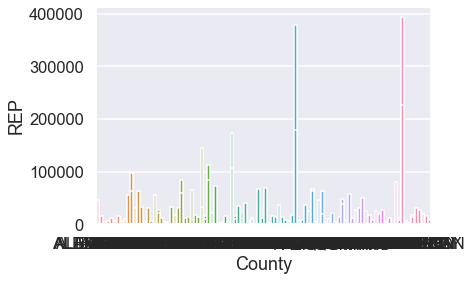

In [63]:
# President
sns.barplot(x = "County", y = "CST", data = prespiv)
sns.barplot(x = "County", y = "DEM", data = prespiv)
sns.barplot(x = "County", y = "GRE", data = prespiv)
sns.barplot(x = "County", y = "LIB", data = prespiv)
sns.barplot(x = "County", y = "REP", data = prespiv)

<AxesSubplot:xlabel='Choice Party', ylabel='Count'>

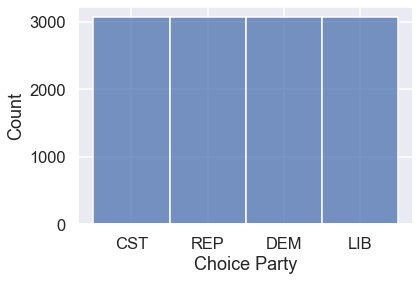